# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | kousseri
Processing Record 9 of Set 1 | khovd
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | labrador city
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | villemur-sur-tarn
Processing Record 18 of Set 1 | crane
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | i

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,5.06,75,40,12.35,CL,1686424446
1,bilibino,68.0546,166.4372,17.17,39,10,1.52,RU,1686424446
2,saint-francois,46.4154,3.9054,21.69,73,0,1.54,FR,1686424446
3,port-aux-francais,-49.3500,70.2167,3.65,57,100,13.14,TF,1686424446
4,blackmans bay,-43.0167,147.3167,10.29,81,98,2.20,AU,1686424447


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,5.06,75,40,12.35,CL,1686424446
1,bilibino,68.0546,166.4372,17.17,39,10,1.52,RU,1686424446
2,saint-francois,46.4154,3.9054,21.69,73,0,1.54,FR,1686424446
3,port-aux-francais,-49.3500,70.2167,3.65,57,100,13.14,TF,1686424446
4,blackmans bay,-43.0167,147.3167,10.29,81,98,2.20,AU,1686424447


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

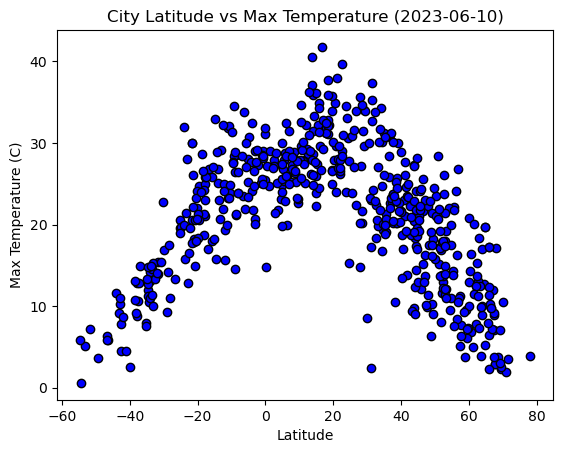

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,color='blue',edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs Max Temperature ({datetime.date.today()})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

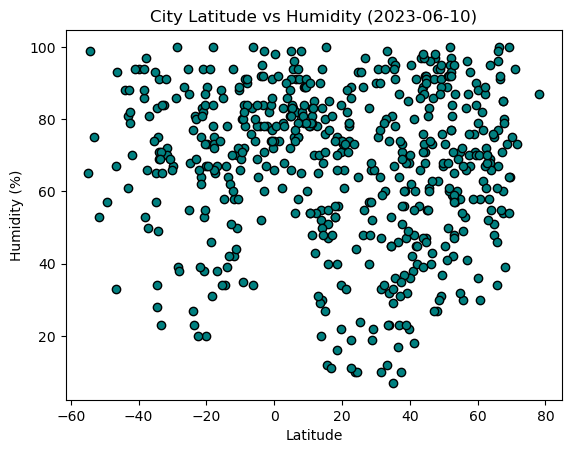

In [31]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,color='teal',edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({datetime.date.today()})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

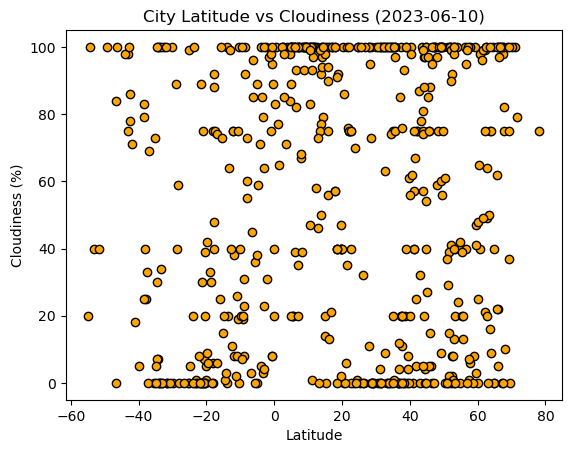

In [32]:
# Build scatter plot for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,color='orange',edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({datetime.date.today()})")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

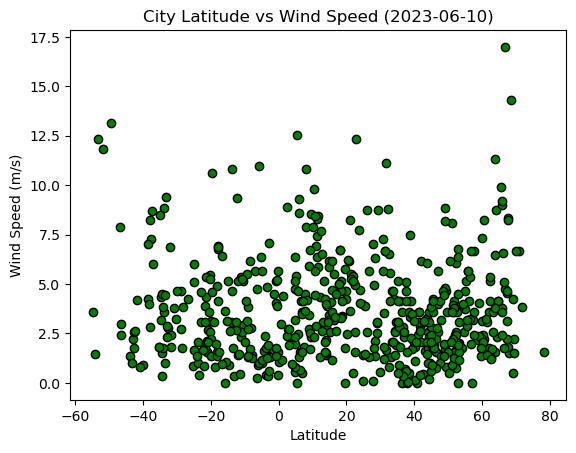

In [33]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,color='green',edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed ({datetime.date.today()})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# # Plot all of the data
# plt.scatter(x_values,y_values,marker="o",
#             facecolors="blue",edgecolors="black",alpha=0.75)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,36),fontsize=15,color="red")
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp")


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,17.17,39,10,1.52,RU,1686424446
2,saint-francois,46.4154,3.9054,21.69,73,0,1.54,FR,1686424446
5,kousseri,12.0769,15.0306,32.21,43,100,4.36,CM,1686424447
6,khovd,48.0056,91.6419,22.26,27,59,1.36,MN,1686424447
8,labrador city,52.9463,-66.9114,17.95,48,100,0.00,CA,1686424447


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,5.06,75,40,12.35,CL,1686424446
3,port-aux-francais,-49.3500,70.2167,3.65,57,100,13.14,TF,1686424446
4,blackmans bay,-43.0167,147.3167,10.29,81,98,2.20,AU,1686424447
7,sola,-13.8833,167.5500,25.08,78,100,10.80,VU,1686424447
9,west island,-12.1568,96.8225,24.99,94,75,9.35,CC,1686424448


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7479621814904831


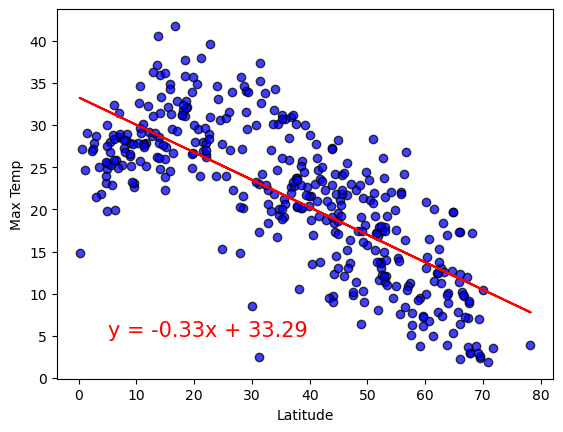

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(x_values,y_values,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print("The r-value is: "+str(rvalue))
plt.show()

The r-value is: 0.852446218366505


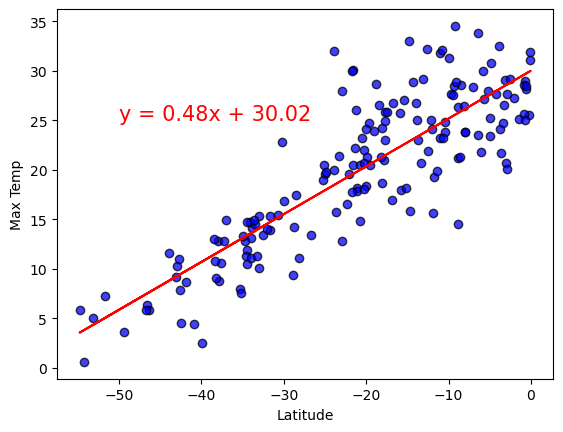

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(x_values,y_values,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print("The r-value is: "+str(rvalue))
plt.show()

**Discussion about the linear relationship:** 
-The preceding regression analysis is taking the latitude data for each city in the sample and regressing it against the maximum temperatures observed on the current date of the API call to see if there exists a strong relationship between the two variables.  
-As one would expect based on what any geography class will teach you, the closer you get to the equator (the closer that latitude is to zero), the higher the temperatures tend to be - whether they be average, median or max temperatures.  This relationship is very strong, with r-squared values in both cases relatively close to the lower and upper bounds of possible values (-1 and +1)  .
-For the Northern Hemisphere regression, the slope of the line is negative as the lower latitude values are closer to the equator (since they are positive values), while in the Southern Hemisphere regression that relationship is the opposite because the latitude values are less than zero.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.01071875509502726


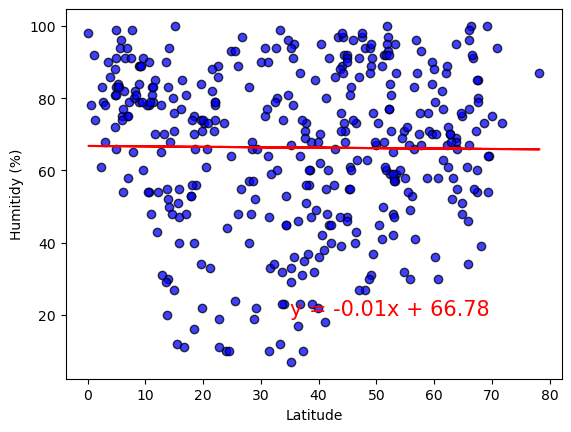

In [44]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(x_values,y_values,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humitidy (%)")
print("The r-value is: "+str(rvalue))
plt.show()

The r-value is: 0.04579576988658864


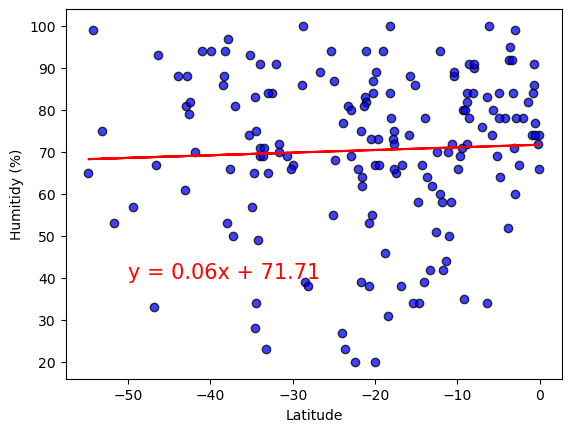

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(x_values,y_values,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humitidy (%)")
print("The r-value is: "+str(rvalue))
plt.show()

**Discussion about the linear relationship:**
-The preceding regression analysis is taking the latitude data for each city in the sample and regressing it against the humidity observed on the current date of the API call to see if there exists a strong relationship between the two variables.  
-In both the Northern and Southern Hemisphere regressions, there does not appear to be a strong relationship between latitude and humidity.  This makes intuitive sense.  Humidity is largely dependent on how much water is found in a given area, as it will impact how much moisture ends up in the air as the air heats up during the day, and water availability is not dependant on proximity to the equator.  Both deserts and rainforests (two land types at the opposite end of the climate spectrum in terms of humidity) can be found at a variety of different latitudes throughout the world.
-The Southern Hemisphere does look to be slightly more humid on average, as indicated by a higher y-intercept line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.18977692821742342


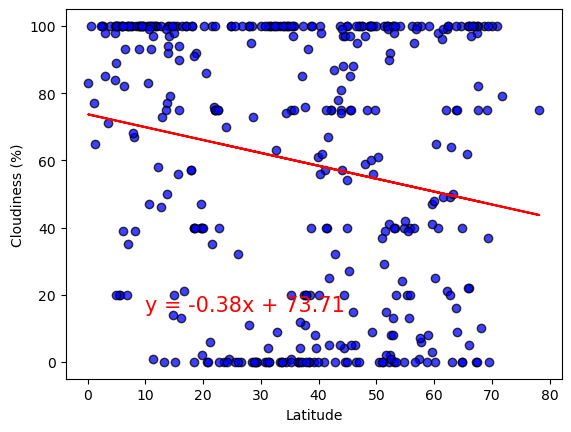

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(x_values,y_values,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print("The r-value is: "+str(rvalue))
plt.show()

The r-value is: 0.003072868912401617


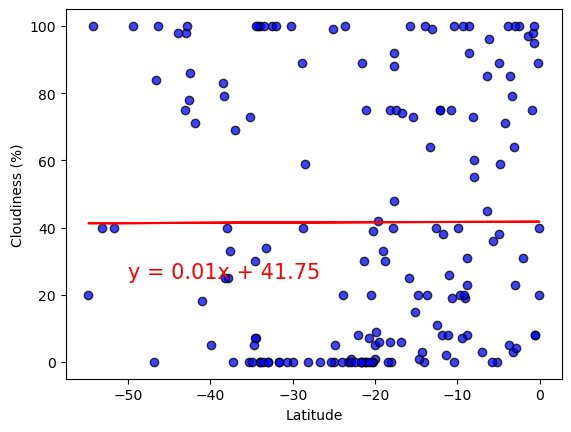

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(x_values,y_values,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print("The r-value is: "+str(rvalue))
plt.show()

**Discussion about the linear relationship:**
-The preceding regression analysis is taking the latitude data for each city in the sample and regressing it against the level of cloud cover observed on the current date of the API call to see if there exists a strong relationship between the two variables.  
-In both the Northern and Southern Hemisphere regressions, there does not appear to be a strong relationship between latitude and humidity.  In fact there are large numbers of instances in both hemispheres where the degree of cloud cover falls at the extreme ends of the spectrum (either no clouds at all or almost completely covered by clouds).  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05397281356756237


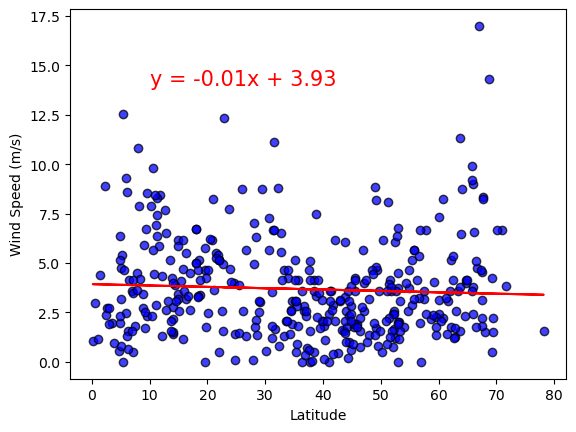

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(x_values,y_values,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print("The r-value is: "+str(rvalue))
plt.show()

The r-value is: -0.21493605065002364


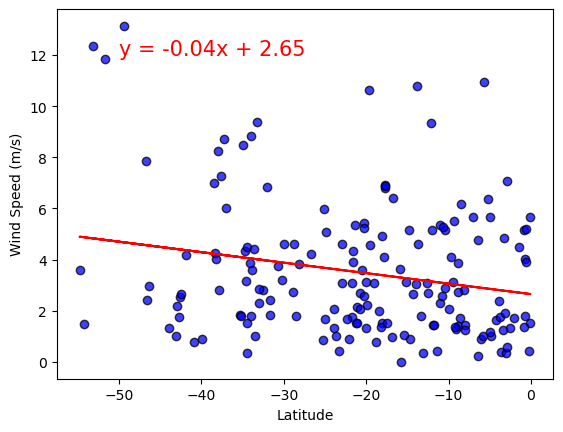

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot all of the data
plt.scatter(x_values,y_values,marker="o",
            facecolors="blue",edgecolors="black",alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print("The r-value is: "+str(rvalue))
plt.show()

**Discussion about the linear relationship:**
-The preceding regression analysis is taking the latitude data for each city in the sample and regressing it against the average wind speeds (in meters/second) observed on the current date of the API call to see if there exists a strong relationship between the two variables.  
-In both the Northern and Southern Hemisphere regressions, there does not appear to be a strong relationship between latitude and humidity.
-The Northern Hemisphere looks to be more windy on average (higher intercept line) and with more obersvations of wind speeds greater than 10 m/s.  